In [1]:
import datajoint as dj
from ibl_pipeline import reference, subject, action, acquisition, data, behavior
import matplotlib.pyplot as plt

Connecting shan@datajoint.internationalbrainlab.org:3306


## Check weights of a subject

In [3]:
subj = subject.Subject & 'subject_nickname="IBL-T1"'
subj

subject_uuid,subject_nickname nickname,sex sex,subject_birth_date birth date,ear_mark ear mark,subject_line name,subject_source name of source,protocol_number protocol number,subject_description
cff66dc1-765e-4e04-abef-92de05bf4f19,IBL-T1,M,2018-11-27,1,None,None,1,None


In [6]:
weighing_time, weight = (action.Weighing & subj).fetch('weighing_time', 'weight')

In [9]:
weighing_date = [time.date() for time in weighing_time]

(array([737091., 737098., 737105., 737112., 737119., 737126., 737133.,
        737140., 737147., 737150., 737157.]),
 <a list of 11 Text xticklabel objects>)

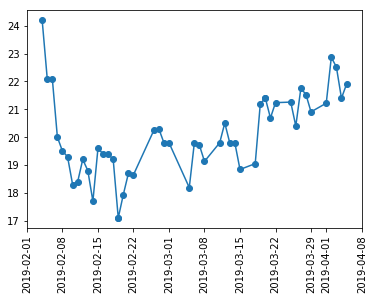

In [22]:
plt.plot(weighing_date, weight, 'o-')
plt.xticks(rotation='vertical')

In [14]:
weighing_with_date = action.Weighing.proj(weighing_date='DATE(weighing_time)')
weighing_with_date

subject_uuid,weighing_time date time,weighing_date calculated attribute
3e97e1d3-2a0f-44e5-b63f-36196d78457a,2018-10-29 16:28:47,2018-10-29
3e97e1d3-2a0f-44e5-b63f-36196d78457a,2018-10-29 16:28:48,2018-10-29
55381f61-4e47-4baa-beb9-70068c0ad62c,2018-11-01 20:49:49,2018-11-01
64c1bdd9-d82f-435f-ac30-fc8032c6e119,2018-10-01 16:00:17,2018-10-01
64c1bdd9-d82f-435f-ac30-fc8032c6e119,2018-11-01 10:38:42,2018-11-01
8e181135-7106-43c1-9cda-d854856e6d95,2018-09-03 16:58:21,2018-09-03
9540b01b-fa1e-4d1e-872b-0b4ccaae3888,2018-09-03 16:51:09,2018-09-03
a4ec3fa0-5415-490a-bf2b-cbf07b017733,2018-12-14 15:39:36,2018-12-14
a4ec3fa0-5415-490a-bf2b-cbf07b017733,2018-12-19 15:26:14,2018-12-19
c68cf5d5-e75a-46f1-8eda-a2db78cf4743,2018-09-03 17:06:09,2018-09-03


In [19]:
weighing_date, weight = (weighing_with_date * action.Weighing & subj).fetch('weighing_date', 'weight')

(array([737091., 737098., 737105., 737112., 737119., 737126., 737133.,
        737140., 737147., 737150., 737157.]),
 <a list of 11 Text xticklabel objects>)

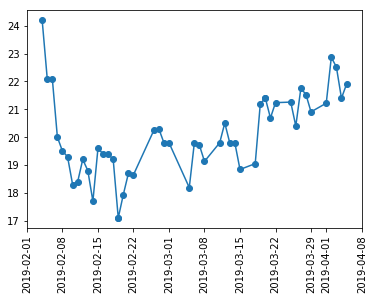

In [24]:
plt.plot(weighing_date, weight, 'o-')
plt.xticks(rotation='vertical')

In [30]:
last_time = subj.aggr(action.Weighing, lastest='MAX(weighing_time)').fetch1('lastest')

In [32]:
weight = (action.Weighing & {'weighing_time': last_time}).fetch1('weight')
weight

21.9

# Query of water type that weekend since September

Step 1: Project the table action.WaterAdministration to only contain the information of interest together with the primary key. 
<br> With `.proj()`, users are able to restrict to certain attributes, rename the existing attributes, or create new attributes computed from the original ones. In this case, we would like to compute the day of week of water administration `water_admin_dow`

In [4]:
water_admin = action.WaterAdministration.proj(
    'watertype_name', water_admin_dow='dayofweek(administration_time)')
water_admin

lab_name name of lab,subject_nickname nickname,administration_time date time,watertype_name,water_admin_dow calculated attribute
churchlandlab,CSHL_001,2019-02-20 18:00:00,Hydrogel,4
churchlandlab,CSHL_001,2019-02-25 17:36:00,Hydrogel,2
churchlandlab,CSHL_001,2019-02-26 17:12:00,Hydrogel,3
churchlandlab,CSHL_002,2019-02-20 18:00:00,Hydrogel,4
churchlandlab,CSHL_003,2019-02-20 18:00:00,Hydrogel,4
churchlandlab,CSHL_003,2019-02-25 17:49:00,Hydrogel,2
churchlandlab,CSHL_003,2019-02-26 18:08:00,Hydrogel,3


Step 2: Restrict to the entries with `administration_time` in the weekend:

In [5]:
water_admin_weekend = water_admin & 'administration_time>"2018-08-31"' & \
    'water_admin_dow in (6,7)' & subj
water_admin_weekend

lab_name name of lab,subject_nickname nickname,administration_time date time,watertype_name,water_admin_dow calculated attribute
angelakilab,IBL-T1,2019-02-08 11:22:31,Water 10% Sucrose,6
angelakilab,IBL-T1,2019-02-09 11:19:01,Water 10% Sucrose,7
angelakilab,IBL-T1,2019-02-15 11:34:33,Water 10% Sucrose,6
angelakilab,IBL-T1,2019-02-16 22:54:23,Water 10% Sucrose,7
angelakilab,IBL-T1,2019-02-22 11:15:07,Water 10% Sucrose,6
angelakilab,IBL-T1,2019-02-22 20:00:39,Water 2% Citric Acid,6
angelakilab,IBL-T1,2019-02-23 20:00:54,Water 2% Citric Acid,7


Step 3: If you want to put the subject_nickname aside, you could use `*` operator, that allows joining of two tables.

In [6]:
subj.proj('subject_nickname') * water_admin_weekend

lab_name name of lab,subject_nickname nickname,administration_time date time,watertype_name,water_admin_dow calculated attribute
angelakilab,IBL-T1,2019-02-08 11:22:31,Water 10% Sucrose,6
angelakilab,IBL-T1,2019-02-09 11:19:01,Water 10% Sucrose,7
angelakilab,IBL-T1,2019-02-15 11:34:33,Water 10% Sucrose,6
angelakilab,IBL-T1,2019-02-16 22:54:23,Water 10% Sucrose,7
angelakilab,IBL-T1,2019-02-22 11:15:07,Water 10% Sucrose,6
angelakilab,IBL-T1,2019-02-22 20:00:39,Water 2% Citric Acid,6
angelakilab,IBL-T1,2019-02-23 20:00:54,Water 2% Citric Acid,7


Finally, if you want, you can also do the whole query in a single line:

In [8]:
(subject.Subject & 'subject_nickname="IBL-T1"').proj('subject_nickname') * (action.WaterAdministration.proj('watertype_name', dow='dayofweek(administration_time)') & 'administration_time>"2018-08-31"' & 'dow in (6,7)')

lab_name name of lab,subject_nickname nickname,administration_time date time,watertype_name,dow calculated attribute
angelakilab,IBL-T1,2019-02-08 11:22:31,Water 10% Sucrose,6
angelakilab,IBL-T1,2019-02-09 11:19:01,Water 10% Sucrose,7
angelakilab,IBL-T1,2019-02-15 11:34:33,Water 10% Sucrose,6
angelakilab,IBL-T1,2019-02-16 22:54:23,Water 10% Sucrose,7
angelakilab,IBL-T1,2019-02-22 11:15:07,Water 10% Sucrose,6
angelakilab,IBL-T1,2019-02-22 20:00:39,Water 2% Citric Acid,6
angelakilab,IBL-T1,2019-02-23 20:00:54,Water 2% Citric Acid,7


# Query of water type on Monday, Tuesday and Friday

Similarly as above:

In [11]:
subj.proj('subject_nickname') * \
    (action.WaterAdministration.proj('watertype_name', water_admin_dow='dayofweek(administration_time)') &  \
     'administration_time>"2018-08-31"' & 'water_admin_dow in (1, 2, 5)')

lab_name name of lab,subject_nickname nickname,administration_time date time,watertype_name,water_admin_dow calculated attribute
angelakilab,IBL-T1,2019-02-07 11:32:43,Water 10% Sucrose,5
angelakilab,IBL-T1,2019-02-10 11:01:28,Water 10% Sucrose,1
angelakilab,IBL-T1,2019-02-11 10:10:47,Water 10% Sucrose,2
angelakilab,IBL-T1,2019-02-14 10:12:29,Water 10% Sucrose,5
angelakilab,IBL-T1,2019-02-17 22:55:40,Water 15% Sucrose,1
angelakilab,IBL-T1,2019-02-18 09:21:18,Water 10% Sucrose,2
angelakilab,IBL-T1,2019-02-18 22:44:13,Water 15% Sucrose,2


# Query of the weight, water intake and trial counts on Monday, Tuesday and Friday.

### Weight

Project the weight table to contain only the weight and the primary key, add attribute `wt_dow` 

In [12]:
weight = action.Weighing.proj('weight', wt_dow='dayofweek(weighing_time)')
weight

lab_name name of lab,subject_nickname nickname,weighing_time date time,weight weight,wt_dow calculated attribute
angelakilab,IBL-T1,2019-02-04 17:09:34,24.2,2
angelakilab,IBL-T1,2019-02-05 17:11:06,22.1,3
angelakilab,IBL-T1,2019-02-06 10:26:47,22.1,4
angelakilab,IBL-T1,2019-02-07 10:53:22,20.0,5
angelakilab,IBL-T1,2019-02-08 10:41:36,19.5,6
angelakilab,IBL-T1,2019-02-09 09:56:21,19.3,7
angelakilab,IBL-T1,2019-02-10 09:45:01,18.3,1


Restrict to the weight that abtained on Monday, Tuesday and Friday:

In [13]:
weight_interest = weight & subj & 'weighing_time>"2018-08-31"' & 'wt_dow in (1, 2, 5)'
weight_interest

lab_name name of lab,subject_nickname nickname,weighing_time date time,weight weight,wt_dow calculated attribute
angelakilab,IBL-T1,2019-02-04 17:09:34,24.2,2
angelakilab,IBL-T1,2019-02-07 10:53:22,20.0,5
angelakilab,IBL-T1,2019-02-10 09:45:01,18.3,1
angelakilab,IBL-T1,2019-02-11 09:17:00,18.4,2
angelakilab,IBL-T1,2019-02-14 08:46:26,17.7,5
angelakilab,IBL-T1,2019-02-17 08:28:23,19.4,1
angelakilab,IBL-T1,2019-02-18 22:46:40,19.2,2


Similarly, if you would like the `subject_nickname` showing aside, do the join trick again:

In [14]:
subj.proj('subject_nickname') * weight_interest

lab_name name of lab,subject_nickname nickname,weighing_time date time,weight weight,wt_dow calculated attribute
angelakilab,IBL-T1,2019-02-04 17:09:34,24.2,2
angelakilab,IBL-T1,2019-02-07 10:53:22,20.0,5
angelakilab,IBL-T1,2019-02-10 09:45:01,18.3,1
angelakilab,IBL-T1,2019-02-11 09:17:00,18.4,2
angelakilab,IBL-T1,2019-02-14 08:46:26,17.7,5
angelakilab,IBL-T1,2019-02-17 08:28:23,19.4,1
angelakilab,IBL-T1,2019-02-18 22:46:40,19.2,2


Again, the whole query would be done in one line as well, giving the same results:

In [15]:
(subject.Subject & 'subject_nickname="IBL-T1"').proj('subject_nickname') * (action.Weighing.proj('weight', wt_dow='dayofweek(weighing_time)') & 'weighing_time>"2018-08-31"' & 'wt_dow in (1, 2, 5)')

lab_name name of lab,subject_nickname nickname,weighing_time date time,weight weight,wt_dow calculated attribute
angelakilab,IBL-T1,2019-02-04 17:09:34,24.2,2
angelakilab,IBL-T1,2019-02-07 10:53:22,20.0,5
angelakilab,IBL-T1,2019-02-10 09:45:01,18.3,1
angelakilab,IBL-T1,2019-02-11 09:17:00,18.4,2
angelakilab,IBL-T1,2019-02-14 08:46:26,17.7,5
angelakilab,IBL-T1,2019-02-17 08:28:23,19.4,1
angelakilab,IBL-T1,2019-02-18 22:46:40,19.2,2


### Water Intake

In [16]:
(subject.Subject & 'subject_nickname="IBL-T1"').proj('subject_nickname') * (action.WaterAdministration.proj('watertype_name', water_intake="water_administered", dow='dayofweek(administration_time)') & 'administration_time>"2018-08-31"' & 'dow in (1, 2, 5)')

lab_name name of lab,subject_nickname nickname,administration_time date time,watertype_name,water_intake water administered,dow calculated attribute
angelakilab,IBL-T1,2019-02-07 11:32:43,Water 10% Sucrose,0.561,5
angelakilab,IBL-T1,2019-02-10 11:01:28,Water 10% Sucrose,0.744,1
angelakilab,IBL-T1,2019-02-11 10:10:47,Water 10% Sucrose,0.732,2
angelakilab,IBL-T1,2019-02-14 10:12:29,Water 10% Sucrose,2.3983,5
angelakilab,IBL-T1,2019-02-17 22:55:40,Water 15% Sucrose,2.0,1
angelakilab,IBL-T1,2019-02-18 09:21:18,Water 10% Sucrose,0.6777,2
angelakilab,IBL-T1,2019-02-18 22:44:13,Water 15% Sucrose,1.0,2
